In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from astropy.io import fits
import sys
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore')

#set plotting defaults to values that make plots look publication ready
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

In [3]:
#load files
matchedfile = 'GaiaAPOGEE_HugeTable_wDistMod.fits'
giant_catalog = fits.open(matchedfile)


In [7]:
#read in magnitudes and distance modulii
J_app = giant_catalog[1].data['J']
H_app = giant_catalog[1].data['H']
K_app = giant_catalog[1].data['K']
DistMod = giant_catalog[1].data['DistMod']

#compute the absolute mags
J_abs = J_app + DistMod
K_abs = K_app + DistMod

#find stars that lie within an acceptable range of colors and mags
realistic = np.where( (J_app - K_app > -1) & (J_app - K_app < 4) & (K_app + DistMod > -10) & (K_app + DistMod < 10) )

In [8]:
#include a restriction on the quality of the parallax detection
parallax = giant_catalog[1].data['parallax']
parallax_error = giant_catalog[1].data['parallax_error']

tenSigmaParallax = np.where( ( (parallax / parallax_error) > 10) & (J_app - K_app > -1) & (J_app - K_app < 4) & (K_app + DistMod > -10) & (K_app + DistMod < 10) )

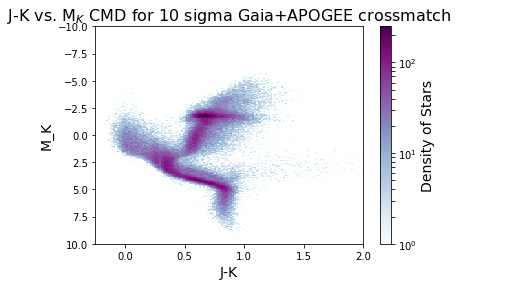

In [9]:
#use the hist2d command to show the density of APOGEE+Gaia stars in the J-K vs. M_K ColorMagnitude Diagram.
JK_CMD = plt.hist2d(J_app[tenSigmaParallax] - K_app[tenSigmaParallax], K_app[tenSigmaParallax] + DistMod[tenSigmaParallax], 
           bins=(250,250), cmap=plt.cm.BuPu, norm=clrs.LogNorm(vmin=(1), vmax=(250)))
plt.colorbar(label = 'Density of Stars')
plt.title('J-K vs. M$_{K}$ CMD for 10 sigma Gaia+APOGEE crossmatch' )
xlabel = plt.xlabel('J-K') 
ylabel = plt.ylabel('M_K')
plt.axis([-0.25,2,10,-10])

plt.savefig('Gaia+APOGEE_J-KvsK_CMD_10Sigma.jpg', bbox_inches='tight') 

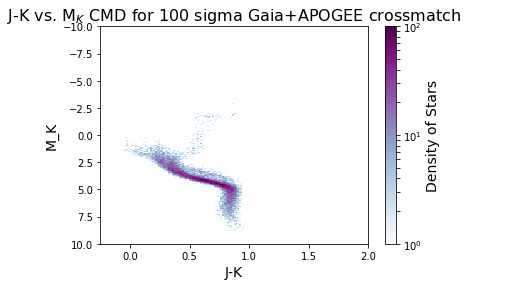

In [11]:
#finally, restrict to 100 sigma parallax detections
hundredSigmaParallax = np.where( ( (parallax / parallax_error) > 100) & (J_app - K_app > -1) & (J_app - K_app < 4) & (K_app + DistMod > -10) & (K_app + DistMod < 10) )

#use the hist2d command to show the density of APOGEE+Gaia stars in the J-K vs. M_K ColorMagnitude Diagram.
JK_CMD = plt.hist2d(J_app[hundredSigmaParallax] - K_app[hundredSigmaParallax], K_app[hundredSigmaParallax] + DistMod[hundredSigmaParallax], 
           bins=(250,250), cmap=plt.cm.BuPu, norm=clrs.LogNorm(vmin=(1), vmax=(100)))
plt.colorbar(label = 'Density of Stars')
plt.title('J-K vs. M$_{K}$ CMD for 100 sigma Gaia+APOGEE crossmatch' )
xlabel = plt.xlabel('J-K') 
ylabel = plt.ylabel('M_K')
plt.axis([-0.25,2,10,-10])

plt.savefig('Gaia+APOGEE_J-KvsK_CMD_100Sigma.jpg', bbox_inches='tight') 

In [121]:
#print(giant_catalog[1].header)

In [119]:
# Getting the field (region) indices
One91_12 = np.where(giant_catalog[1].data['field']=='191-12')
K2_C4_168_21 = np.where(giant_catalog[1].data['field']=='K2_C4_168-21')
TWO03PLUS04 = np.where(giant_catalog[1].data['field']=='203+04')
IC348 = np.where(giant_catalog[1].data['field']=='IC348')
LAMBDAORI_A = np.where(giant_catalog[1].data['field']=='LAMBDAORI-A')
LAMBDAORI_B = np.where(giant_catalog[1].data['field']=='LAMBDAORI-B')
N1333 = np.where(giant_catalog[1].data['field']=='N1333')
ORIONA = np.where(giant_catalog[1].data['field']=='ORIONA')
ORIONB = np.where(giant_catalog[1].data['field']=='ORIONB')
ORIONB_A = np.where(giant_catalog[1].data['field']=='ORIONB-A')
ORIONB_B = np.where(giant_catalog[1].data['field']=='ORIONB-B')
ORIONC = np.where(giant_catalog[1].data['field']=='ORIONC')
ORIOND = np.where(giant_catalog[1].data['field']=='ORIOND')
ORIONE = np.where(giant_catalog[1].data['field']=='ORIONE')
ORIONOB1AB_F = np.where(giant_catalog[1].data['field']=='ORIONOB1AB-F')
PLEIADES_E = np.where(giant_catalog[1].data['field']=='PLEIADES-E')
Pleiades = np.where(giant_catalog[1].data['field']=='Pleiades')



# The indices of MS and non_MS stars 
All_Indices = np.where(giant_catalog[1].data['field'])
MS_Indices = np.unique(np.concatenate([One91_12,  K2_C4_168_21,  TWO03PLUS04,  
                IC348,  LAMBDAORI_A,  LAMBDAORI_B,  N1333,  ORIONA,  ORIONB,  
                ORIONB_A,  ORIONB_B,  ORIONC,  ORIOND,  ORIONE,  ORIONOB1AB_F,
                PLEIADES_E,  Pleiades], axis = 1))
Non_MS_Indices = np.setdiff1d(All_Indices,MS_Indices)



# lists should be the same size if everything worked out
print(np.size(Non_MS_Indices) + np.size(MS_Indices)) 
print(np.size(giant_catalog[1].data['field']))

254478
254478


In [120]:
# Inferring metallicity from photometry
J = giant_catalog[1].data['J'][MS_Indices]
K = giant_catalog[1].data['K'][MS_Indices]
g = 30


# C is an array of constant coefficients used in the [FE/H] calculation.
C = np.array([-14.2959, 0.0519, 29.5926, -0.0529, -17.6762, 0.7032])

# The equation for determining metallicity. g, J, and K need updated with correct variable names when applied.
Fe_H = C[0] + C[1] * (g-K) + C[2] * (J-K) + (C[3] * (g-K)**2) + (C[4] * (J-K)**2) + C[5] * (g-K) * (J-K)

K

In [84]:
#Inferring mass and Teff from M_K
T_eff = 1


In [87]:
#Using Teff and [Fe/H] to assign log g to stars

log_g = 7.912 - 0.1880 * Fe_H - 1.335e-3 * T_eff + 1.313e-7 * ( T_eff ** 2 )

1.313e-07


In [16]:
def find_indices(ID1,ID2,ID_min):
    ID2_index = []
    ID1_index = []
    index = 0
    for x in range(len(ID2)):
        if ID2[x] == ID1[index]:
            ID1_index.append(index)
            ID2_index.append(x)
            index += 1
        elif ID2[x] > ID1[index]:
            index += 1
        if (x+1>=ID_min):
            return ID1_index, ID2_index
    return ID1_index, ID2_index



def make_JmK_vs_MK(xaxis, yaxis, title, xtitle, ytitle):
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.ylim(10,-15)
    plt.xlim(-2.5,5)
    plt.scatter(xaxis, yaxis, s=0.01)
    plt.show()

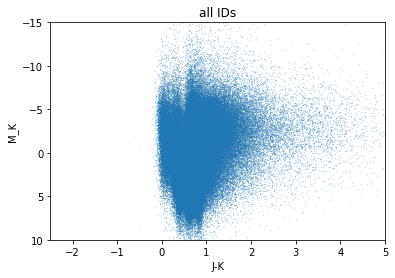

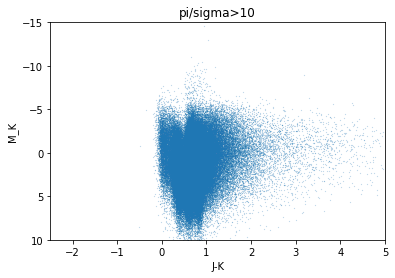

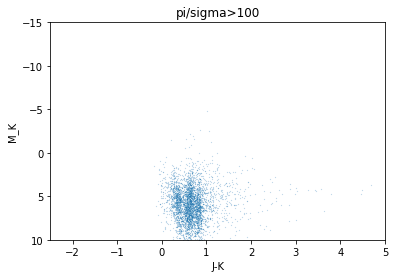

[-9.99999e+03  7.31400e+00  1.06700e+01 ...  9.63500e+00  8.46300e+00
  1.10390e+01]
[-9.99999e+03  8.59700e+00  1.10740e+01 ...  1.07110e+01  9.33700e+00
  1.18970e+01]
['2M00000002+7417074' '2M00000019-1924498' '2M00000032+5737103' ...
 'AP17470046-2431218' 'AP17470802-2440426' 'VESTA']


In [20]:
crossMatch = "allStar_l31c2_GaiaDR2_crossmatch_withpms.fits"
JKH = "allStar-l31c.2.fits" #J,kh valshdul2
HDU1 = fits.open(crossMatch)
HDU2 = fits.open(JKH)

ID1 = HDU1[1].data['APOGEE_ID']
ID2 = HDU2[1].data['APOGEE_ID']
ID_min = min(len(ID1), len(ID2))

#get rid of the IDs not in both

ID1 = np.sort(ID1)
ID2 = np.sort(ID2)
ID1_index, ID2_index = find_indices(ID1,ID2,ID_min)
   

parallax = HDU1[1].data['parallax'][ID1_index]

distance = 1/(.001*parallax)
distance_mod = 5*np.log10(distance)-5
K_app = HDU2[1].data['K'][ID2_index]
J_app = HDU2[1].data['J'][ID2_index]
K_abs = K_app-distance_mod
J_abs = distance_mod+J_app
make_JmK_vs_MK(J_app-K_app, K_abs, "all IDs", "J-K", "M_K")



absG = HDU1[1].data['phot_g_mean_mag'][ID1_index]-distance_mod
bpm_rp = HDU1[1].data['phot_bp_mean_mag'][ID1_index] - HDU1[1].data['phot_rp_mean_mag'][ID1_index]
#plt.plot(absG,bpm_rp)



par_over_error = HDU1[1].data['parallax_over_error'][ID1_index]
sort = np.where(par_over_error>10)
K_app10 = K_app[sort]
J_app10 = J_app[sort]
K_abs10 = K_abs[sort]
J_abs10 = J_abs[sort]
make_JmK_vs_MK( J_app10-K_app10, K_abs10, "pi/sigma>10", "J-K", "M_K")


par_over_error = HDU1[1].data['parallax_over_error'][ID1_index]
sort = np.where(par_over_error>300)
K_app100 = K_app[sort]
J_app100 = J_app[sort]
K_abs100 = K_abs[sort]
J_abs100 = J_abs[sort]
make_JmK_vs_MK( J_app100-K_app100, K_abs100, "pi/sigma>100", "J-K", "M_K")
print(K_app)
print(J_app)

print(ID2)


In [35]:
#demonstrating the sort function works, but it doesn't entirely. Last index
test1 = [1,2,4,5,6,8,10,11,14]
test2 = [1,3,4,5,6,7,8,10,11,12,14,15]
testlen = min(len(test1), len(test2))
print(testlen)
test1 = np.sort(test1)
test2 = np.sort(test2)
test_index1, test_index2 = find_indices(test1,test2,testlen)

new1 = test1[test_index1]
new2 = test2[test_index2]

print(new1)
print(new2)


9
[ 1  4  5  6  8 10 11]
[ 1  4  5  6  8 10 11]


2014-08-10
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / Number of bits per data pixel                  NAXIS   =                    1 / Number of data axes                            NAXIS1  =                 8575 /                                                PCOUNT  =                    0 / No Group Parameters                            GCOUNT  =                    1 / One Data Group                                 CRVAL1  =        4.17900000000 /                                                CDELT1  =    6.00000000000E-06 /                                                CRPIX1  =                    1 /                                                CTYPE1  = 'LOG-LINEAR'         /                                                DC-FLAG =                    1 /                                                BUNIT   = 'Flux (10^-17 erg/s/cm^2/Ang)' /                                      END                          

(15960, 16000)

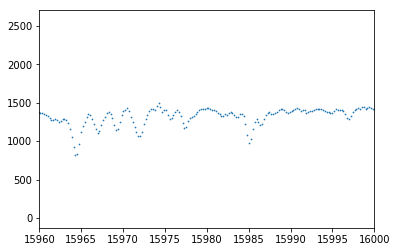

In [5]:
#A random fits file from Dr. Covey's server
random = "apStarC-r5-2M21432388+4209512.fits"
hdu = fits.open(random)


'''hdu[0].header['NAME'], where you can pull anything 
named NAME from the header file. See link (in slack) for list of NAME's. 
 https://data.sdss.org/datamodel/files/APOGEE_REDUX/APRED_VERS
/APSTAR_VERS/TELESCOPE/LOCATION_ID/apStar.html'''
date = hdu[0].header['DATE']
print(date)

#the header, showing starting wavelength and other
fluxhead = hdu[1].header 
print(fluxhead)
#the data
flux = hdu[1].data
print("\n", flux)

#relevant information (starting wavelength, and conversion) found in header
wavelength = 10.**(4.179+6e-6*np.arange(0,len(flux),1))

plt.scatter(wavelength,flux,s=0.5)
plt.xlim(15960,16000)